In [242]:
import pandas
import matplotlib.pyplot as plt

enade2017 = pandas.read_csv("MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})
enade2017.shape

(537436, 150)

In [243]:
'''
NT_GER
Nota bruta da prova - Média ponderada da formação geral (25%) e componente específico (75%). (valor de 0 a 100)
min = 0
max = 98,10

QE_I06: Onde e com quem você mora atualmente?
A = Em casa ou apartamento, sozinho.
B = Em casa ou apartamento, com pais e/ou parentes.
C = Em casa ou apartamento, com cônjuge e/ou filhos.
D = Em casa ou apartamento, com outras pessoas (incluindo república).
E = Em alojamento universitário da própria instituição.
F = Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro)

QE_I13
Ao longo da sua trajetória acadêmica, você recebeu algum tipo de bolsa acadêmica? No caso de haver mais de uma opção, marcar apenas a bolsa de maior duração.
A = Nenhum.
B = Bolsa de iniciação científica.
C = Bolsa de extensão.
D = Bolsa de monitoria/tutoria.
E = Bolsa PET.
F = Outro tipo de bolsa acadêmica.
'''

tabela = pandas.DataFrame(enade2017, columns=['NT_GER', 'QE_I06', 'QE_I13', 'CO_GRUPO'])
tabela.head(10)

,NT_GER,QE_I06,QE_I13,CO_GRUPO
0,"52,6",A,A,5710
1,"63,1",C,A,5710
2,"33,7",B,D,5710
3,"58,1",D,A,5710
4,"46,3",B,A,5710
5,"64,2",B,D,5710
6,"41,4",B,D,5710
7,"48,8",B,A,5710
8,"52,9",B,A,5710
9,"62,7",B,D,5710


In [244]:
# restringindo o estudo dentre os alunos do curso de Ciência da Computação
tabela = tabela[tabela['CO_GRUPO'] == 4004]

In [245]:
# limpeza dos dados
# substitui vírgula por ponto
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')
print(tabela['NT_GER'])

# observe os NaN (not a number)

383       58.7
384       49.8
385        NaN
386       40.1
387       53.2
388       52.4
389       22.4
390       53.3
391       44.4
392       66.0
393       36.5
394       32.1
395       23.0
396       55.8
397       35.5
398       39.5
399       68.3
400       46.5
401       39.1
402       25.4
403       36.0
404       54.9
405       61.9
450       43.3
451       50.6
452       62.8
453       42.7
454       51.5
455       79.9
456        NaN
          ... 
535801     NaN
536049     NaN
536050     NaN
537204     NaN
537205     NaN
537206     NaN
537207     NaN
537208     NaN
537209     NaN
537210     NaN
537211     NaN
537212     NaN
537213     NaN
537214     NaN
537215     NaN
537216     NaN
537217     NaN
537218     NaN
537219     NaN
537220     NaN
537221     NaN
537222     NaN
537223     NaN
537224     NaN
537225     NaN
537226     NaN
537227     NaN
537228     NaN
537229     NaN
537230     NaN
Name: NT_GER, Length: 10186, dtype: object


In [246]:
'''
No arquivo 'Dicionário de variáveis dos Microdados do Enade_Edição 2017' descreve que:
o codigo 222 no campo TP_PR_GER significa ausente, 556 e 888 são participações desconsideradas.
Portanto, algumas notas podem ser desconsideradas dependendo do seu objetivo, 
e aqui, será de calcular a média daqueles que fizeram a prova.
'''
tabela = tabela.loc[(tabela['NT_GER'].notnull())]

tabela['NT_GER'] = pandas.to_numeric(tabela['NT_GER'])

print(tabela)
print(tabela['NT_GER'].mean())

        NT_GER QE_I06 QE_I13  CO_GRUPO
383       58.7      B      B      4004
384       49.8      A      C      4004
386       40.1      B      B      4004
387       53.2      D      B      4004
388       52.4      B      B      4004
389       22.4      A      A      4004
390       53.3      A      B      4004
391       44.4      B      B      4004
392       66.0      B      B      4004
393       36.5      B      C      4004
394       32.1      B      A      4004
395       23.0      B      B      4004
396       55.8      B      B      4004
397       35.5      B      B      4004
398       39.5      C      C      4004
399       68.3      B      B      4004
400       46.5      B      B      4004
401       39.1      D      B      4004
402       25.4      D      B      4004
403       36.0      B      B      4004
404       54.9      D      D      4004
405       61.9      D      B      4004
450       43.3      B      A      4004
451       50.6    NaN    NaN      4004
452       62.8      B    

In [247]:
# resumo estatístico
tabela['NT_GER'].describe()

count    8489.000000
mean       43.262775
std        13.633212
min         0.000000
25%        33.700000
50%        42.300000
75%        52.400000
max        95.100000
Name: NT_GER, dtype: float64

In [248]:
# somente as notas de quem respondeu a questão sobre bolsas
tabela = tabela.loc[(tabela['QE_I13'].notnull())]

# somente as notas de quem respondeu a questão sobre moradia
tabela = tabela.loc[(tabela['QE_I06'].notnull())]

In [249]:
# mapeamento de valores
tabela['QE_I06'] = tabela['QE_I06'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F': 6})
tabela['QE_I13'] = tabela['QE_I13'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F': 6})

In [250]:
tabela.QE_I06.head(10)

383    2
384    1
386    2
387    4
388    2
389    1
390    1
391    2
392    2
393    2
Name: QE_I06, dtype: int64

In [251]:
tabela.QE_I13.head(10)

383    2
384    3
386    2
387    2
388    2
389    1
390    2
391    2
392    2
393    3
Name: QE_I13, dtype: int64

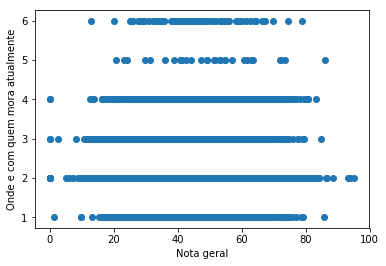

In [252]:
# visualmente
plt.scatter(tabela.NT_GER, tabela.QE_I06)
plt.ylabel('Onde e com quem mora atualmente')
plt.xlabel('Nota geral')
plt.show()

In [253]:
# estudantes que moram em alojamentos
comAlojamento = tabela.loc[tabela.QE_I06 == 5]
comAlojamento.NT_GER.describe()

count    29.000000
mean     49.872414
std      15.941767
min      20.700000
25%      40.700000
50%      51.400000
75%      60.600000
max      85.900000
Name: NT_GER, dtype: float64

In [254]:
# estudantes que não moram em alojamentos
semAlojamento = tabela.loc[tabela.QE_I06 != 5]
semAlojamento.NT_GER.describe()

count    8379.000000
mean       43.301957
std        13.613366
min         0.000000
25%        33.800000
50%        42.300000
75%        52.500000
max        95.100000
Name: NT_GER, dtype: float64

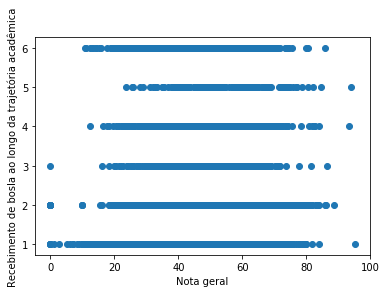

In [255]:
# visualmente
plt.scatter(tabela.NT_GER, tabela.QE_I13)
plt.ylabel('Recebimento de bosla ao longo da trajetória acadêmica')
plt.xlabel('Nota geral')
plt.show()

In [256]:
# estudantes que receberam bolsa
comBolsa = tabela.loc[tabela.QE_I13 != 1]
comBolsa.NT_GER.describe()

count    3015.000000
mean       49.126567
std        13.951450
min         0.000000
25%        39.400000
50%        49.300000
75%        58.700000
max        93.900000
Name: NT_GER, dtype: float64

In [257]:
# estudantes que não receberam bolsa
semBolsa = tabela.loc[tabela.QE_I13 == 1]
semBolsa.NT_GER.describe()

count    5393.000000
mean       40.080994
std        12.302738
min         0.000000
25%        31.700000
50%        39.300000
75%        47.900000
max        95.100000
Name: NT_GER, dtype: float64

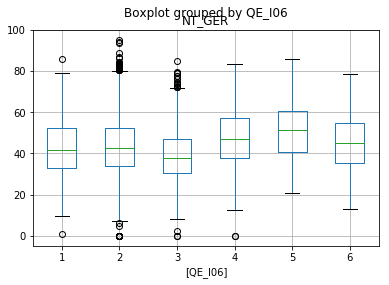

In [278]:
# verificação de resultados
qe06 = pandas.DataFrame(tabela, columns=['NT_GER', 'QE_I06'])
qe06.boxplot(by='QE_I06')

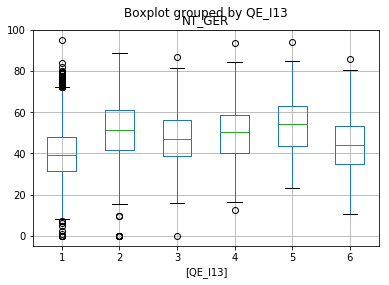

In [259]:
qe13 = pandas.DataFrame(tabela, columns=['NT_GER', 'QE_I13'])
qe13.boxplot(by='QE_I13')

In [260]:
# a análise de variância (ANOVA) é um teste usado para comparar as médias de dois grupos. 
# suposições: normalidade, independência e variância homegênea

# nota geral agrupada pela questão 06
tabela['NT_GER'].groupby(tabela['QE_I06']).describe()

,count,mean,std,min,25%,50%,75%,max
QE_I06,,,,,,,,
1,729.0,42.884774,13.567003,1.2,32.9,41.7,52.300,85.7
2,5762.0,43.470462,13.539830,0.0,34.1,42.5,52.500,95.1
3,1020.0,39.292647,12.986906,0.0,30.4,38.0,47.025,84.6
4,787.0,47.427700,13.638345,0.0,37.9,47.0,57.300,83.1
5,29.0,49.872414,15.941767,20.7,40.7,51.4,60.600,85.9
6,81.0,45.471605,13.214313,12.9,35.4,45.1,54.700,78.7


In [261]:
# nota geral agrupada pela questão 13
tabela['NT_GER'].groupby(tabela['QE_I13']).describe()

,count,mean,std,min,25%,50%,75%,max
QE_I13,,,,,,,,
1,5393.0,40.080994,12.302738,0.0,31.700,39.3,47.900,95.1
2,1400.0,51.183071,14.203853,0.0,41.575,51.6,61.125,88.6
3,379.0,47.116095,12.295492,0.0,38.650,46.8,56.100,86.5
4,455.0,49.510549,13.391774,12.5,40.300,50.2,58.550,93.3
5,163.0,54.262577,13.278011,23.5,43.550,54.3,62.900,93.9
6,618.0,44.063430,13.328950,10.7,34.825,44.0,53.475,85.7


(0.9836128354072571, 0.9189285635948181)


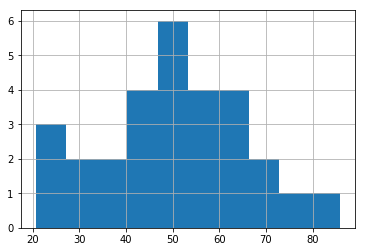

In [266]:
#teste das suposições
import scipy.stats as stats

print(stats.shapiro(qe06.NT_GER.loc[qe06.QE_I06 == 5]))

#print(stats.shapiro(qe06.NT_GER.loc[qe06.QE_I06 != 5]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados.
qe06.NT_GER.loc[qe06.QE_I06 == 5].hist()

#qe06.NT_GER.loc[qe06.QE_I06 != 5].hist()

(0.9952930808067322, 3.155765579410108e-12)


C:\Users\Iarah\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


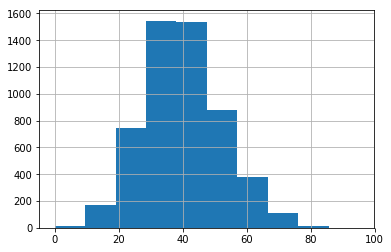

In [267]:
print(stats.shapiro(qe13.NT_GER.loc[qe13.QE_I13 == 1]))

#print(stats.shapiro(qe13.NT_GER.loc[qe13.QE_I13 != 1]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qe13.NT_GER.loc[qe13.QE_I13 == 1].hist()

#qe13.NT_GER.loc[qe13.QE_I13 != 1].hist()

In [264]:
# teste não paramétrico são métodos que não assumem uma distribuição específica para os dados.
stat, p = stats.mannwhitneyu(qe06.NT_GER.loc[qe06.QE_I06 == 5], qe06.NT_GER.loc[qe06.QE_I06 != 5])

print('Mann-Whitney: Estatisticas = %.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
    
stat, p = stats.kruskal(qe06.NT_GER.loc[qe06.QE_I06 == 5], qe06.NT_GER.loc[qe06.QE_I06 != 5])
print('Kruskal-Wallis: Estatisticas = %.3f, p = %.3f' % (stat, p))

if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
#anova
stat, p = stats.f_oneway(qe06.NT_GER.loc[qe06.QE_I06 == 5], qe06.NT_GER.loc[qe06.QE_I06 != 5])
print('Anova: Estatisticas = %.3f, p = %.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

Mann-Whitney: Estatisticas = 90872.000, p = 0.009
Distribução diferente
Kruskal-Wallis: Estatisticas = 5.508, p = 0.019
Distribução diferente
Anova: Estatisticas = 6.724, p = 0.010
Distribução diferente


In [265]:
# teste não paramétrico são métodos que não assumem uma distribuição específica para os dados.
stat, p = stats.mannwhitneyu(qe13.NT_GER.loc[qe13.QE_I13 == 1], qe13.NT_GER.loc[qe13.QE_I13 != 1])

print('Mann-Whitney: Estatisticas = %.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
    
stat, p = stats.kruskal(qe13.NT_GER.loc[qe13.QE_I13 == 1], qe13.NT_GER.loc[qe13.QE_I13 != 1])
print('Kruskal-Wallis: Estatisticas = %.3f, p = %.3f' % (stat, p))

if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
#anova
stat, p = stats.f_oneway(qe13.NT_GER.loc[qe13.QE_I13 == 1], qe13.NT_GER.loc[qe13.QE_I13 != 1])
print('Anova: Estatisticas = %.3f, p = %.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

Mann-Whitney: Estatisticas = 5039902.500, p = 0.000
Distribução diferente
Kruskal-Wallis: Estatisticas = 838.014, p = 0.000
Distribução diferente
Anova: Estatisticas = 948.199, p = 0.000
Distribução diferente
